<a href="https://colab.research.google.com/github/Deendayal6265/Machine-Learning-Algorithms/blob/main/SVM/SVM_CLASSIFIER_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Required Libraries**

In [38]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 


# **Load the dataset from sklearn library**

In [3]:
from sklearn import datasets 
data = datasets.load_iris()

In [13]:
data

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [23]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [25]:
df = pd.DataFrame(data.data,columns=data.feature_names)

In [26]:
df.shape

(150, 4)

In [27]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [28]:
df['target'] = data.target

In [29]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [30]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [35]:
df[df.target==1].sum()

sepal length (cm)    296.8
sepal width (cm)     138.5
petal length (cm)    213.0
petal width (cm)      66.3
target                50.0
dtype: float64

In [37]:
df['flower_name'] = df.target.apply(lambda x: data.target_names[x])
df.sample(6)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
12,4.8,3.0,1.4,0.1,0,setosa
121,5.6,2.8,4.9,2.0,2,virginica
36,5.5,3.5,1.3,0.2,0,setosa
97,6.2,2.9,4.3,1.3,1,versicolor
66,5.6,3.0,4.5,1.5,1,versicolor
42,4.4,3.2,1.3,0.2,0,setosa


In [39]:
df0= df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

In [44]:
df0.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
12,4.8,3.0,1.4,0.1,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
33,5.5,4.2,1.4,0.2,0,setosa
34,4.9,3.1,1.5,0.2,0,setosa
20,5.4,3.4,1.7,0.2,0,setosa


In [40]:
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [41]:
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


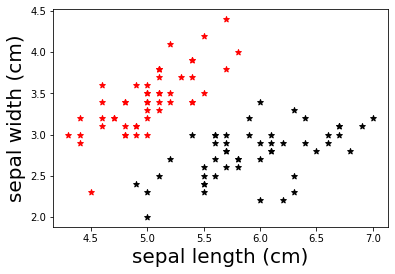

In [56]:
plt.xlabel('sepal length (cm)',size=20)
plt.ylabel('sepal width (cm)',size=20)
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color="red",marker='*')

plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color="black",marker='*')

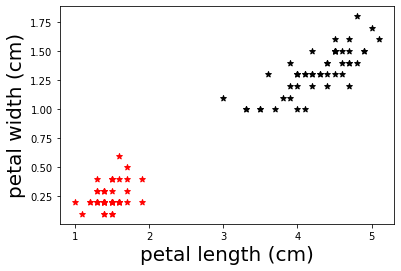

In [57]:
plt.xlabel('petal length (cm)',size=20)
plt.ylabel('petal width (cm)',size=20)
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color="red",marker='*')

plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color="black",marker='*')

# **Split DataSet**

In [60]:
x= df.iloc[:,0:4]

In [62]:
y=df.iloc[:,4:5]

In [72]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1)

In [73]:
x_train.shape

(112, 4)

In [74]:
from sklearn.svm import SVC
model = SVC()

In [75]:
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [77]:
model.score(x_test,y_test)   # test score of the model  . 

0.9736842105263158

In [78]:
model.score(x_train,y_train) # this is the training score of the model . 

0.9732142857142857